In [263]:

import numpy as np
import pandas as pd
import geopandas as gpd

import geoplot
import geoplot.crs as gcrs

In [264]:
data = gpd.read_file("vdl_vie_citoyenne.contour_de_bureau_de_vote.geojson")
# data = gpd.read_file("lambert_lyon.geojson")
data.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [265]:
data

nom      canton       circonscription  num_bureau num_lieu  gid  \
0    409   3e CANTON  2eme circonscription         409      405    1   
1    401   3e CANTON  2eme circonscription         401      401    2   
2    410   3e CANTON  2eme circonscription         410      405    3   
3    412   3e CANTON  2eme circonscription         412      406    4   
4    408   3e CANTON  2eme circonscription         408      404    5   
..   ...         ...                   ...         ...      ...  ...   
299  744              1ere circonscription         744      745  300   
300  734              1ere circonscription         734      710  301   
301  736  10e CANTON  1ere circonscription         736      736  302   
302  739              1ere circonscription         739      711  303   
303  740              1ere circonscription         740      711  304   

                                              geometry  
0    POLYGON ((4.83151 45.77434, 4.83223 45.77438, ...  
1    POLYGON ((4.82696 45.77398, 4.82706 45.77448, ...  
2    POLYGON ((4.83768 45.77412, 4.83781 45.77411, ...  
3    POLYGON ((4.83489 45.77716, 4.83319 45.77719, ...  
4    POLYGON ((4.82928 45.78250, 4.82937 45.78256, ...  
..                                                 ...  
299  POLYGON ((4.83770 45.73819, 4.83770 45.73819, ...  
300  POLYGON ((4.83564 45.73473, 4.83576 45.73492, ...  
301  POLYGON ((4.81919 45.72884, 4.81931 45.72934, ...  
302  POLYGON ((4.83486 45.72984, 4.83479 45.72964, ...  
303  POLYGON ((4.83191 45.72842, 4.83259 45.72951, ...  

[304 rows x 7 columns]

In [266]:
data = data[['num_bureau', 'geometry']].copy()

<GeoAxesSubplot:>

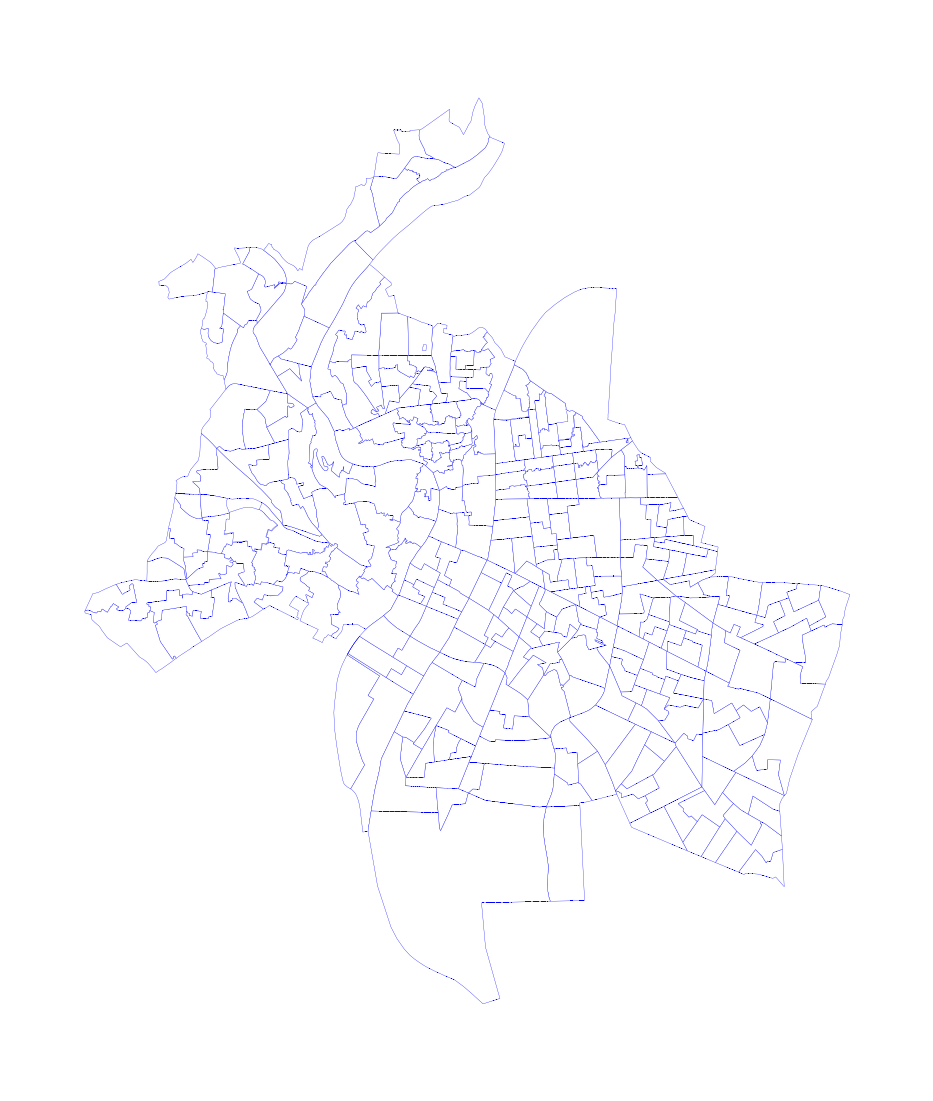

In [267]:
data.crs

data['geometry'] = data.buffer(0)


plot = geoplot.polyplot(data, projection=gcrs.AlbersEqualArea(), edgecolor='blue', facecolor='white', linewidth=.3,
    figsize=(20, 20))

# plot = geoplot.polyplot(data, projection=gcrs.LambertAzimuthalEqualArea(), edgecolor='blue', facecolor='white', linewidth=.3,
#      figsize=(12, 8))

plot

In [337]:
a = data.geometry[1]
b = data.geometry[106]

In [338]:
# a.union(b)

a.overlaps(b)

False

<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>


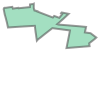

In [340]:
# p = b.intersection(a)
# a.union(b).difference(p)

from shapely.geometry import mapping


c = b.union(a)

# c.convex_hull

from shapely.geometry import JOIN_STYLE
eps = 0.00001

print(type(c))


c = c.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.mitre)

print(type(c))

c



In [271]:
data['geometry'].apply(lambda x: x.touches(a)).argmax()


106

In [272]:
Connectivity_matrix = np.array([data['geometry'].apply(lambda x: x.touches(circo) or x.overlaps(circo)) for circo in data.geometry])

Connectivity_matrix.sum(axis=1)

array([ 7,  4,  5,  5,  7,  5,  5,  5,  5,  5,  8,  6,  6,  4,  4,  5,  6,
        6,  5,  8,  8,  6,  6,  7,  7,  8,  4,  6,  5,  6,  6,  4,  3,  5,
        6,  5,  4,  9,  5,  7,  5,  5,  5,  6,  6,  4,  6,  4,  8,  5,  6,
        7,  5,  7,  6,  7,  5,  6,  8,  7,  5,  8, 10,  8,  6,  9,  6,  5,
        8,  5,  4,  5,  4,  3,  3,  2,  5,  6,  6,  7,  8,  4,  6,  5,  5,
        6,  5,  6,  9,  4,  4,  3,  3,  6,  6,  5,  8,  5,  7, 10,  6,  9,
        7,  6,  5,  7,  7,  7,  6,  7,  4,  6,  7,  6,  6,  6,  5,  6,  6,
        4,  5,  9,  6,  6,  5,  3,  5,  4,  5,  5,  2,  6,  7,  2,  4,  6,
        4,  4,  7,  4,  9,  5,  4,  6,  4,  7,  4,  6,  6,  8,  6,  7,  5,
        8,  8,  6,  6,  2,  8,  4,  4,  7,  8,  5,  6,  3,  4,  3,  5,  3,
        7,  4,  5,  9,  5,  7,  4,  4,  5,  4,  4,  4,  3,  8,  5,  7,  6,
        4,  8,  6,  6,  5,  4,  7,  5,  8,  7,  6,  6,  6,  4,  4,  5,  6,
        7, 10,  4,  7,  3,  5,  5,  5,  4,  6,  7,  7,  5,  5,  5,  6,  6,
        6,  5,  7,  5,  5

In [273]:
data['voisins'] = Connectivity_matrix.sum(axis=1)

In [274]:
data['regroupé'] = 1

In [399]:
def regroupement(df:gpd.GeoDataFrame)->gpd.GeoDataFrame:
    Connectivity = np.array([df['geometry'].apply(lambda x: x.touches(circo) or x.overlaps(circo)) for circo in df.geometry])
    df['voisins'] = Connectivity.sum(axis=1)
    tmp = (df['regroupé'] == df['regroupé'].min())
    invader_index = (df['voisins']*tmp).argmin()
    voisins = Connectivity[invader_index]
    # print(f"il y a {voisins.sum()} voisins")
    # print(df.loc[voisins, 'regroupé'])
    invaded_index = df.loc[voisins, 'regroupé']
    invaded_index = invaded_index.index[np.array(invaded_index).argmin()]
    # print(invaded_index)

    
    invaded = df.loc[invaded_index, 'geometry']
    invader = df.loc[invader_index, 'geometry']
    # print(f"victime : {invaded}")
    # print(f"envahisseur : {invader}")
    eps = 0.00001
    # print(type(invader))
    # print(type(invaded))
    # print(invaded.touches(invader))
    # print(invaded.overlaps(invader))
    new_geometry = invader.union(invaded)
    new_geometry = new_geometry.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.mitre)
    # print(type(new_geometry))

    # fusion = {'regroupé' : [invader.regroupé + invaded.regroupé],
    #             'voisins' : [invader.voisins + invaded.voisins - 1], # faux
    #             'num_bureau' : [invader.num_bureau + invaded.num_bureau], #' + '.join([str(invader.num_bureau), str(invaded.num_bureau)]),
    #             'geometry' : [new_geometry.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.mitre)]}
    # fusion = gpd.GeoDataFrame(fusion)
    fusion = df.loc[[invaded_index, invader_index], ['regroupé', 'voisins', 'num_bureau'] ].sum()
    fusion['geometry'] = new_geometry
    return pd.concat((df.drop(labels=[invaded_index, invader_index]), fusion.to_frame().T), ignore_index=True)
    # return df.drop(labels=[invaded_index, invader_index]).append(fusion, ignore_index=True)
    

In [393]:
regroupement(data.copy())

Int64Index([271], dtype='int64')


num_bureau                                           geometry voisins  \
0          409  POLYGON ((4.83151 45.77434, 4.83157 45.77452, ...       7   
1          401  POLYGON ((4.82696 45.77398, 4.82706 45.77448, ...       4   
2          410  POLYGON ((4.83768 45.77412, 4.83773 45.77420, ...       5   
3          412  POLYGON ((4.83489 45.77716, 4.83319 45.77719, ...       5   
4          408  POLYGON ((4.82928 45.78250, 4.82937 45.78256, ...       7   
..         ...                                                ...     ...   
298        734  POLYGON ((4.83564 45.73473, 4.83576 45.73492, ...       4   
299        736  POLYGON ((4.81919 45.72884, 4.81931 45.72934, ...       7   
300        739  POLYGON ((4.83486 45.72984, 4.83479 45.72964, ...       5   
301        740  POLYGON ((4.83191 45.72842, 4.83259 45.72951, ...       7   
302       1645  POLYGON ((4.88748 45.72040, 4.88607 45.72149, ...       5   

    regroupé  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
298        1  
299        1  
300        1  
301        1  
302        2  

[303 rows x 4 columns]

In [402]:
tmp = data.copy()

while len(tmp) > 75:
    print(len(tmp), end='\r')
    tmp = regroupement(tmp)


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/home/timothee/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


<GeoAxesSubplot:>

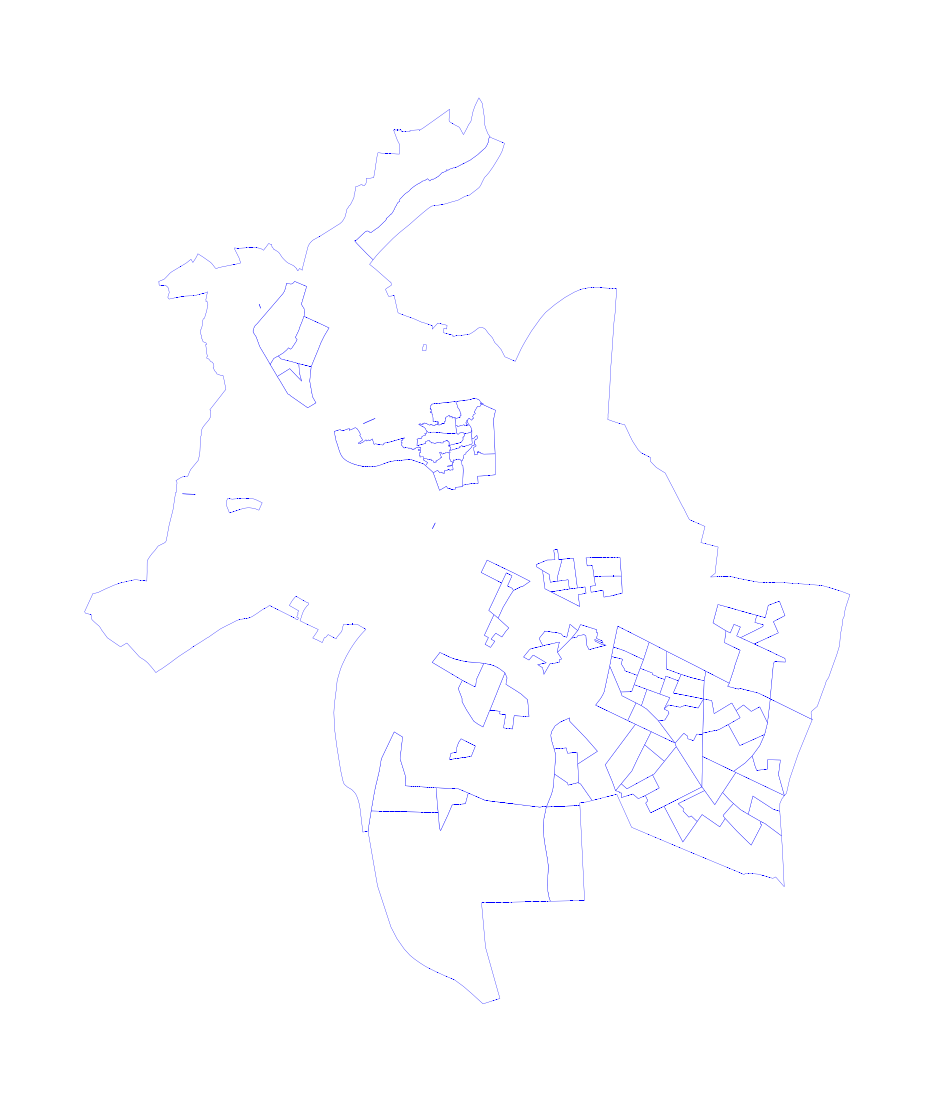

In [403]:
plot = geoplot.polyplot(tmp, projection=gcrs.AlbersEqualArea(), edgecolor='blue', facecolor='white', linewidth=.3,
    figsize=(20, 20))

# plot = geoplot.polyplot(data, projection=gcrs.LambertAzimuthalEqualArea(), edgecolor='blue', facecolor='white', linewidth=.3,
#      figsize=(12, 8))

plot

In [376]:
tmp.explore()

In [377]:
(tmp.regroupé != 1).sum()

1